In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


df = pd.read_csv("../data/BostonHousing.csv")
# Handle missing values (if any)
df_cleaned = df.dropna()

# No categorical variables in this dataset, so no encoding is needed

# Normalize/standardize numerical features
features = df_cleaned.drop("medv", axis=1)
target = df_cleaned["medv"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
# scripts/evaluate_model.py
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = lr.predict(X_test)

# Hyperparameter tuning using Ridge regression with cross-validation
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)

print("Best Alpha:", grid_search.best_params_['alpha'])

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Best Alpha: 1.0

Model Evaluation:
Mean Squared Error (MSE): 24.31
R-squared (R²): 0.67


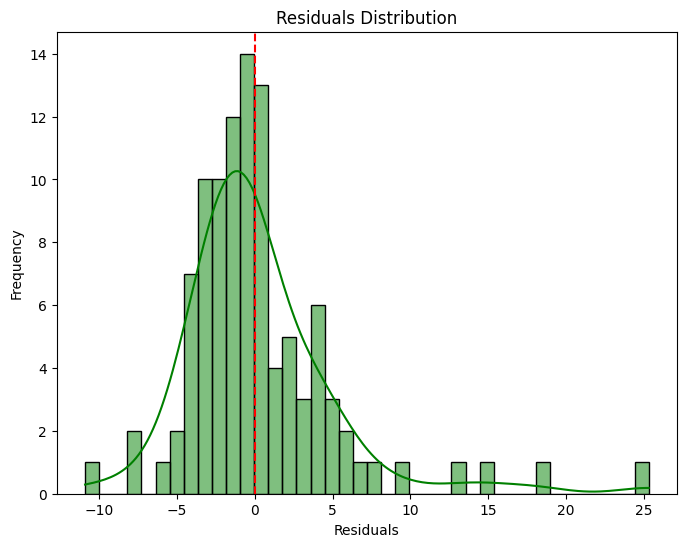

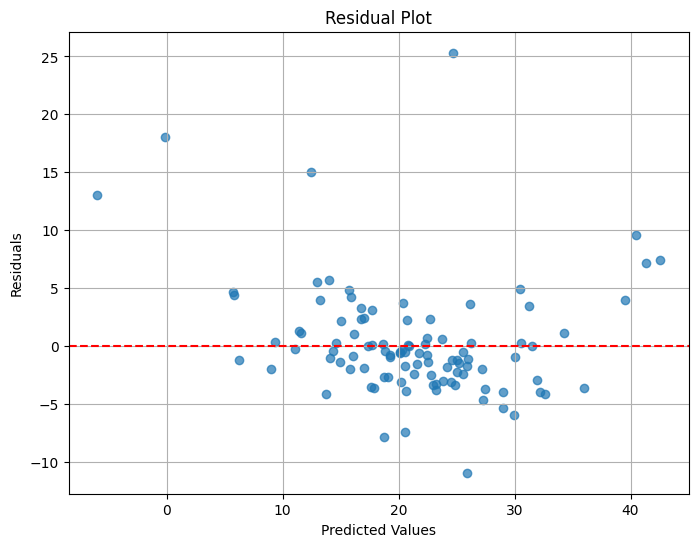

In [30]:
# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=40, color="green")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()